In [2]:
import pandas as pd
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=b14ed5c911261eb92594a4bf8fafc5354a34a926c0e1c4f1f1bcef71f93e6b91
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from scipy.stats import zscore

In [5]:
dataset = pd.read_csv('/content/African_crises_dataset.csv')

In [6]:
dataset.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [8]:
dataset.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [9]:
dataset['country_code'].unique()

array(['DZA', 'AGO', 'CAF', 'CIV', 'EGY', 'KEN', 'MUS', 'MAR', 'NGA',
       'ZAF', 'TUN', 'ZMB', 'ZWE'], dtype=object)

In [10]:
dataset = dataset.drop(columns=['country_number','country' ])

In [11]:
# Create a pandas profiling report
profile = ProfileReport(dataset, title="Pandas Profiling Report", explorative=True)
profile.to_file("pandas_profiling_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
dataset.shape

(1059, 12)

In [13]:
# Calculate Z-scores of numeric columns
z_scores = np.abs(zscore(dataset.select_dtypes(include=[np.number])))

# Filter out rows with Z-score greater than 3
dataset = dataset[(z_scores < 3).all(axis=1)]

# Verify the shape of the dataset after removing outliers
print(dataset.shape)

(894, 12)


In [15]:
# Encode categorical features
categorical_features = dataset.select_dtypes('object').columns
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Verify encoding
print(dataset.head())

   country_code  year  systemic_crisis  exch_usd  domestic_debt_in_default  \
1             3  1871                0  0.052798                         0   
2             3  1872                0  0.052274                         0   
3             3  1873                0  0.051680                         0   
4             3  1874                0  0.051308                         0   
5             3  1875                0  0.051546                         0   

   sovereign_external_debt_default  gdp_weighted_default  \
1                                0                   0.0   
2                                0                   0.0   
3                                0                   0.0   
4                                0                   0.0   
5                                0                   0.0   

   inflation_annual_cpi  independence  currency_crises  inflation_crises  \
1             14.149140             0                0                 0   
2             -3.7

In [16]:
# Select target variable and features
x = dataset.drop(columns=['banking_crisis'])
y = dataset['banking_crisis']

# Verify the shapes of X and y
print(x.shape, y.shape)

(894, 11) (894,)


In [17]:
# Split the dataset into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data (fit on training set and transform both training and test sets)
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [18]:
# Verify the shapes of the training and test sets
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(715, 11) (179, 11) (715,) (179,)


In [19]:
# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(xtrain, ytrain)

# Predict on the test set
y_pred = classifier.predict(xtest)

In [20]:
# Evaluate the model
print("Classification Report:")
print(classification_report(ytest, y_pred))

print("Accuracy Score:")
print(accuracy_score(ytest, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.99      1.00      1.00       177

    accuracy                           0.99       179
   macro avg       1.00      0.75      0.83       179
weighted avg       0.99      0.99      0.99       179

Accuracy Score:
0.994413407821229


In [23]:
confusion_matrix = confusion_matrix(ytest, y_pred)

confusion_matrix

array([[  1,   1],
       [  0, 177]])

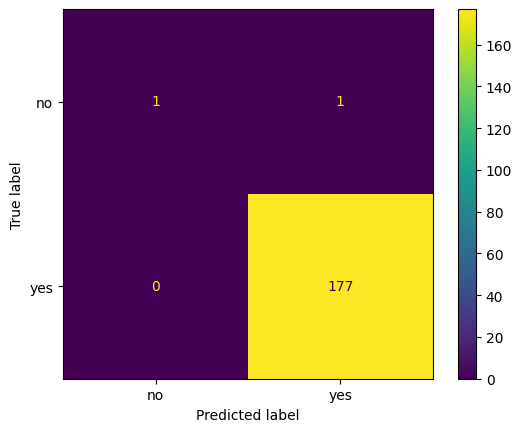

In [24]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['no', 'yes'])
cm_display.plot()
plt.show()